In [ ]:
import tensorflow as tf
from tensorflow.keras import layers,models
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets
# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout


In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0


In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout

model = Sequential()
model.add(Input(shape=(32, 32, 3)))  # input layer

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))  # 10 classes for CIFAR-10



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 72ms/step - accuracy: 0.4114 - loss: 1.6462 - val_accuracy: 0.5246 - val_loss: 1.3242
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 137s 69ms/step - accuracy: 0.6152 - loss: 1.0938 - val_accuracy: 0.6163 - val_loss: 1.0767
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 68ms/step - accuracy: 0.6886 - loss: 0.8959 - val_accuracy: 0.6883 - val_loss: 0.8889
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 146s 71ms/step - accuracy: 0.7272 - loss: 0.7869 - val_accuracy: 0.7097 - val_loss: 0.8496
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 67ms/step - accuracy: 0.7609 - loss: 0.6943 - val_accuracy: 0.7061 - val_loss: 0.8499
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 68ms/step - accuracy: 0.7875 - loss: 0.6178 - val_accuracy: 0.6810 - val_loss: 0.9578
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 143s 69ms/step - accuracy: 0.8039 - loss: 0.5597 - val_accuracy: 0.7376 - val_loss: 0.8085
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 140s 67ms/step - accuracy: 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step


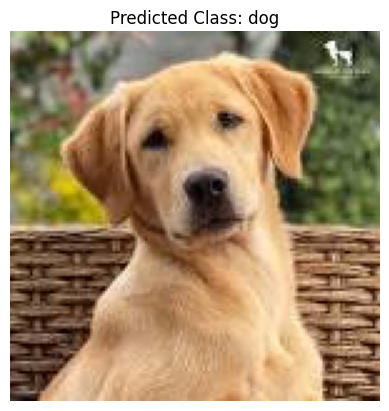

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

# Load and prepare the image (after uploading the image to Colab)
img_path = '/content/dog.jpeg'  # Update this path if your image is named differently
test_img = cv2.imread(img_path)  # Load the image using OpenCV
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV uses BGR by default)

# Resize the image to match the CIFAR-10 input size (32x32)
resized_img = cv2.resize(test_img, (32, 32))

# Normalize the image pixel values (CIFAR-10 data is between 0 and 1)
normalized_img = resized_img / 255.0

# Expand the image dimensions to match the model's input (shape should be (1, 32, 32, 3))
input_img = np.expand_dims(normalized_img, axis=0)

# Predict the class of the image
pred = model.predict(input_img)
pred_class = np.argmax(pred)  # Get the class with the highest probability

# Display the result
plt.imshow(test_img)  # Display the image
plt.title(f"Predicted Class: {classes[pred_class]}")  # Show the predicted class
plt.axis('off')  # Hide axes
plt.show()


In [ ]:
model.save('my_cnn_model.h5')
